# Linear Modelling - Least Squares

_Linear modelling_ is the process of learning a linear relationship between attributes and responces. Consider the following data set where $x_n$ denotes the nth olympic year and $t_n$ denotes the nth time of the mens 100m.

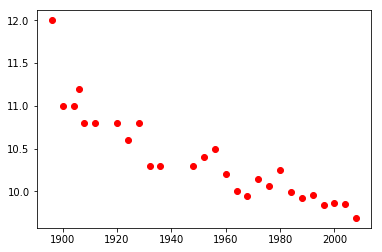

In [8]:
x = [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 
     1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008]
t = [12.00, 11.00, 11.00, 11.20, 10.80, 10.80, 10.80, 10.60, 10.80, 10.30, 10.30, 10.30, 10.40, 10.50, 10.20, 10.00, 
     9.95, 10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85, 9.69]

import matplotlib.pyplot as plt
plt.plot(x, t, 'ro')
plt.show()

## Defining the model

We can clearly see a statistical dependence between year and time (note this is not clausal).

We will define are model as a function that maps the input attributes (olympic year) to the target values (winning time). Clearly this function will involves terms other than $x$ called _parameters_, these are the values that we learn from the data set. A function $f$ that maps input attributes $x_0, ..., x_n$ with parameters $w_0, ..., w_k$ is denoted as $f(x_0, ..., x_n; w_0, ... w_k)$.

To pick which model we are going to use, we make the assumtion that the data can be modelled linearly, thus the function will be of the form.

$$
t = f(x; w_0, w_1) = w_0 + w_1 x
$$

## Loss function

To find the _best_ model we must define what the _best_ means. In our case we a looking for the line which is as close to all data points as possible. A common way to measure this is the squared diffrence known as the squared loss function:

$$
\mathcal{L}_n(t_n, f(x_n; w_0, w_1)) = (t_n - f(x_n; w_0, w_1))^2
$$

The smaller the loss for year $n$, the closer the model at $x_n$ is to $t_n$. We need a low loss for all years, thus we find the average loss:

$$
\mathcal{L} = \frac{1}{N} \sum^{N}_{n = 1} L_n(t_n, f(x_n; w_0, w_1))
$$

Thus we will tune $w_0$ and $w_1$ such that the average loss is minimilized, expressed mathmatically:

$$
\operatorname*{argmin}_{w_0, w_1} = \frac{1}{N} \sum^N_{n=1} L_n(t_n, f(x_n; w_0, w_1))
$$

We have choosen this loss function because we can find values for $w_0$ and $w_1$ analytically however other loss functions could be used such as the absolute loss:

$$
\mathcal{L}_n = \left| t_n - f(x_n; w_0, w_1) \right|
$$

## Finding a solution

To find the $\operatorname*{argmin}_{w_0, w_1} = \frac{1}{N} \sum^N_{n=1} L_n(t_n, f(x_n; w_0, w_1))$ we can differentiate to find the point in which the gradient is zero (the minima of the function).

First we substiture the linear model into the expression for average loss:
$$
\begin{align}
\mathcal{L} &= \frac{1}{N} \sum^{N}_{n = 1} L_n(t_n, f(x_n; w_0, w_1)) \\
&= \frac{1}{N} \sum^{N}_{n = 1} (t_n - f(x_n; w_0, w_1))^2 \\
&= \frac{1}{N} \sum^{N}_{n = 1} (t_n - (w_0 x_n + w_1))^2 \\
&= \frac{1}{N} \sum^{N}_{n = 1} (w_1^2 x_n^2 + 2 w_1 x_n w_0 - 2 w_1 x_n t_n + w_0^2 - 2 w_0 t_n + t_n^2) \\
&= \frac{1}{N} \sum^{N}_{n = 1} (w_1^2 x_n^2 + 2 w_1 x_n (w_0 - t_n) + w_0^2 - 2 w_0 t_n + t_n^2) \\
\end{align}
$$

Differentiate with respect to $w_0$

$$
\begin{align}
\frac{1}{N} \sum^{N}_{n = 1} (w_0^2 + 2 w_1 x_n w_0 - 2 w_0 t_n) && \text{Remove terms not including $w_0$} \\
w_0^2 + 2 w_1 w_0 \frac{1}{N} \left( \sum^{N}_{n = 1} x_n \right) - 2 w_0 \frac{1}{N} \left( \sum^{N}_{n = 1} t_n \right) && \text{Rearrange} \\
\frac{\partial{\mathcal{L}}}{\partial{w_0}} = 2 w_0 + 2 w_1 \frac{1}{N} \left( \sum^{N}_{n = 1} x_n \right) - \frac{2}{N} \left( \sum^{N}_{n = 1} t_n \right) && \text{Differentiate}
\end{align}
$$

Differentiate with respect to $w_1$

$$
\begin{align}
\frac{1}{N} \sum^{N}_{n = 1} (w_1^2 x_n^2 + 2 w_1 x_n w_0 - 2 w_1 x_n t_n)) && \text{Remove terms not including $w_1$} \\
w_1^2\frac{1}{N} \left( \sum^{N}_{n = 1} x_n^2 \right) + 2 w_1 w_0 \frac{1}{N} \left( \sum^{N}_{n = 1} x_n \right) - 2 w_1 \frac{1}{N} \left( \sum^{N}_{n = 1} x_n t_n \right) && \text{Rearrange} \\
\frac{\partial{\mathcal{L}}}{\partial{w_1}} = 2 w_1 \frac{1}{N} \left( \sum^{N}_{n = 1} x_n^2 \right) + 2 w_0 \frac{1}{N} \left( \sum^{N}_{n = 1} x_n \right) - \frac{2}{N} \left( \sum^{N}_{n = 1} x_n t_n \right) && \text{Differentiate}
\end{align}
$$

Differentiate again, to check if the turning point is a minima
$$
\begin{align}
\frac{\partial^2{\mathcal{L}}}{\partial{w_0}} &= 2 \\
\frac{\partial^2{\mathcal{L}}}{\partial{w_1}} &= \frac{2}{N} \sum^N_{n=1}{x^2_n} \\
\end{align}
$$


Set $\frac{\partial{\mathcal{L}}}{\partial{w_0}}$ to $0$

$$
\begin{align}
2 w_0 + 2 w_1 \frac{1}{N} \left( \sum^{N}_{n = 1} x_n \right) - \frac{2}{N} \left( \sum^{N}_{n = 1} t_n \right) &= 0 \\
2 w_0 &= \frac{2}{N} \left( \sum^{N}_{n = 1} t_n \right) - 2 w_1 \frac{1}{N} \left( \sum^{N}_{n = 1} x_n \right) \\
w_0 &= \frac{1}{N} \left( \sum^{N}_{n = 1} t_n \right) - w_1 \frac{1}{N} \left( \sum^{N}_{n = 1} x_n \right) \\
\widehat{w_0} &= \bar{t} - w_1 \bar{x} \\
\end{align}
$$

Subing in the new expression for $w_0$ into $\frac{\partial{\mathcal{L}}}{\partial{w_1}}$ we get:

$$
\begin{align}
\frac{\partial{\mathcal{L}}}{\partial{w_1}} &= 2 w_1 \frac{1}{N} \left( \sum^{N}_{n = 1} x_n^2 \right) + 2 \hat{w_0} \frac{1}{N} \left( \sum^{N}_{n = 1} x_n \right) - \frac{2}{N} \left( \sum^{N}_{n = 1} x_n t_n \right) \\
&= 2 w_1 \frac{1}{N} \left( \sum^{N}_{n = 1} x_n^2 \right) + 2 (\bar{t} - w_1 \bar{x}) \frac{1}{N} \left( \sum^{N}_{n = 1} x_n \right) - \frac{2}{N} \left( \sum^{N}_{n = 1} x_n t_n \right) \\
&= w_1 \frac{2}{N} \left( \sum^{N}_{n = 1} x_n^2 \right) + \bar{t} \frac{2}{N} \left( \sum^{N}_{n = 1} x_n \right) - w_1 \bar{x} \frac{2}{N} \left( \sum^{N}_{n = 1} x_n \right) - \frac{2}{N} \left( \sum^{N}_{n = 1} x_n t_n \right)
\end{align}
$$

Simplify using $\bar{x} = \frac{1}{N} \sum^{N}_{n = 1} x_n$

$$
\frac{\partial{\mathcal{L}}}{\partial{w_1}} = w_1 \frac{2}{N} \left( \sum^{N}_{n = 1} x_n^2 \right) + 2 \bar{t} \bar{x} - 2 w_1 (\bar{x})^2 - \frac{2}{N} \left( \sum^{N}_{n = 1} x_n t_n \right)
$$

Set $\frac{\partial{\mathcal{L}}}{\partial{w_1}}$ to $0$

$$
\begin{align}
w_1 \frac{2}{N} \left( \sum^{N}_{n = 1} x_n^2 \right) + 2 \bar{t} \bar{x} - 2 w_1 (\bar{x})^2 - \frac{2}{N} \left( \sum^{N}_{n = 1} x_n t_n \right) &= 0 \\
w_1 \frac{2}{N} \left( \sum^{N}_{n = 1} x_n^2 \right) - 2 w_1 (\bar{x})^2 &= \frac{2}{N} \left( \sum^{N}_{n = 1} x_n t_n \right) - 2 \bar{t} \bar{x} \\
w_1 \left[\frac{2}{N} \left( \sum^{N}_{n = 1} x_n^2 \right) - 2 (\bar{x})^2 \right] &= \frac{2}{N} \left( \sum^{N}_{n = 1} x_n t_n \right) - 2 \bar{t} \bar{x} \\
w_1 &= \frac{\frac{1}{N} \left( \sum^{N}_{n = 1} x_n t_n \right) - \bar{t} \bar{x}}{\frac{1}{N} \left( \sum^{N}_{n = 1} x_n^2 \right) - (\bar{x})^2} \\
\end{align}
$$

To simplify we will define a few more average quantitys, $\overline{x^2} = \frac{1}{N} \sum^{N}_{n = 1} x_n^2$ and $\overline{xt} = \frac{1}{N} \sum^{N}_{n = 1} x_n t_n$, thus we arrive at:

$$
\widehat{w_1} = \frac{\overline{xt} - \bar{x} \bar{t}}{\overline{x^2} - (\bar{x})^2}
$$

Thus all that we need to compute the best parameter values are:

$$
\begin{align}
\widehat{w_0} &= \bar{t} - w_1 \bar{x}\\
\widehat{w_1} &= \frac{\overline{xt} - \bar{x} \bar{t}}{\overline{x^2} - (\bar{x})^2}\\
\end{align}
$$

## Least squares fit

In [9]:
import numpy as np

t_bar = np.average(t)
x_bar = np.average(x)
xt_bar = np.average([x[i] * t[i] for i in range(len(x))])
x2_bar = np.average(list(map(lambda xi: xi**2, x)))

w1 = (xt_bar - x_bar * t_bar) / (x2_bar - x_bar ** 2)
w0 = t_bar - w1 * x_bar

print("w0 = {}, w1 = {}".format(w0, w1))

w0 = 36.41645590250286, w1 = -0.013330885710960602


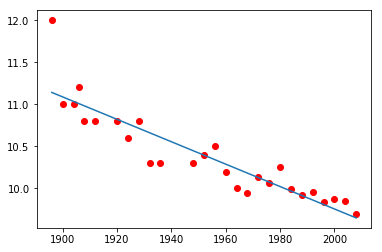

In [10]:
model_x = np.linspace(min(x), max(x), 100)
model_t = list(map(lambda xi: w0 + w1 * xi, model_x))
import matplotlib.pyplot as plt
plt.plot(x, t, 'ro')
plt.plot(model_x, model_t)
plt.show()